In [75]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Cleaned_Genre_Studio_Data.csv')

df.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,"Oct 4, 2015","Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,"Oct 10, 2014","Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,"Jul 7, 2017","Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
4,4,31758,Kizumonogatari III: Reiketsu-hen,Action,1.0,214621,502,22.0,8.83,Movie,Shaft,"Jan 6, 2017",NaN


In [3]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

df.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,2015-10-04,"Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,2014-10-10,"Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,2017-07-07,"Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,2009-04-05,"Jul 4, 2010"
4,4,31758,Kizumonogatari III: Reiketsu-hen,Action,1.0,214621,502,22.0,8.83,Movie,Shaft,2017-01-06,NaN


In [4]:
df2 = df.drop(df.loc[df['Start Date']=='Not available'].index)

df2.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,2015-10-04,"Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,2014-10-10,"Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,2017-07-07,"Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,2009-04-05,"Jul 4, 2010"
4,4,31758,Kizumonogatari III: Reiketsu-hen,Action,1.0,214621,502,22.0,8.83,Movie,Shaft,2017-01-06,NaN


In [5]:
df2['year'] = df2['Start Date'].dt.year

In [35]:
df2.to_csv('Cleaned_Genre_Studio_Data_onlyWtimeData.csv')

In [6]:
df2.sort_values(by='Start Date')

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date,year
10390,10538,23651,Hanawa Hekonai Kappa Matsuri,Kids,1.0,189,13573,12202.0,5.50,NaN,NaN,1917-01-01,NaN,1917
13180,13388,23189,Dekobou Shingachou: Meian no Shippai,Comedy,1.0,403,11501,6902.0,6.33,NaN,NaN,1917-02-01,NaN,1917
3683,3783,17387,Imokawa Mukuzo: Genkanban no Maki,Comedy,1.0,480,11094,9422.0,5.66,NaN,NaN,1917-04-01,NaN,1917
9667,9787,23187,Chamebou Shin Gachou: Nomi Fuufu Shikaeshi no ...,Comedy,1.0,224,12987,11726.0,5.85,NaN,NaN,1917-04-28,NaN,1917
14012,14236,24575,Yume no Jidousha,Cars,1.0,256,12589,14585.0,5.47,NaN,NaN,1917-05-01,NaN,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,1647,35136,Koukyoushihen Eureka Seven Hi-Evolution 3,Adventure,1.0,6693,5120,NaN,NaN,NaN,NaN,2021-01-01,NaN,2021
1604,1679,39938,Inu-Ou,Music,1.0,739,10232,NaN,NaN,NaN,NaN,2021-01-01,NaN,2021
14491,14799,39486,Gintama (Shinsaku),Action,NaN,1848,8394,NaN,NaN,NaN,NaN,2021-01-01,NaN,2021
14655,15000,39938,Inu-Ou,Music,1.0,739,10232,NaN,NaN,NaN,NaN,2021-01-01,NaN,2021


In [7]:
yearCount_df = df2['year'].value_counts()

In [8]:
yearCount_df2 = yearCount_df.sort_index()

In [9]:
yearCount_df2.info()

<class 'pandas.core.series.Series'>
Int64Index: 100 entries, 1917 to 2021
Series name: year
Non-Null Count  Dtype
--------------  -----
100 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


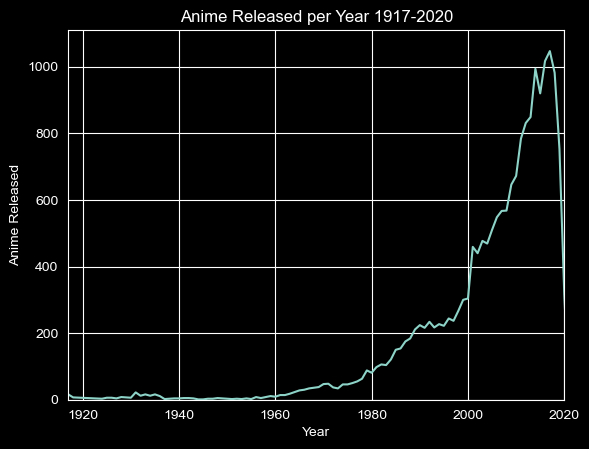

In [71]:
plt.plot(yearCount_df2.index,yearCount_df2)
plt.xlim([1917,2020])
plt.ylim([0,1110])
plt.style.use("dark_background")
plt.title('Anime Released per Year 1917-2020')
plt.ylabel("Anime Released")
plt.xlabel("Year")
plt.show()

In [10]:
df3 = df2.drop(df2.loc[df2['End Date']=='Not Available'].index)

In [11]:
df4 = df3.dropna(subset=['End Date'])

df4.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date,year
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,2015-10-04,"Mar 27, 2016",2015
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,2014-10-10,"Mar 20, 2015",2014
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,2017-07-07,"Sep 29, 2017",2017
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,2009-04-05,"Jul 4, 2010",2009
5,5,37510,Mob Psycho 100 II,Action,13.0,442310,176,21.0,8.89,TV,Bones,2019-01-07,"Apr 1, 2019",2019


In [12]:
df4 = df4.dropna(subset=['End Date'])

In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9696 entries, 0 to 18936
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  9696 non-null   int64         
 1   uid         9696 non-null   int64         
 2   Name        9696 non-null   object        
 3   genre       9682 non-null   object        
 4   episodes    9191 non-null   float64       
 5   members     9696 non-null   int64         
 6   popularity  9696 non-null   int64         
 7   ranked      7654 non-null   float64       
 8   score       9475 non-null   float64       
 9   Type        1842 non-null   object        
 10  Studio      1842 non-null   object        
 11  Start Date  9696 non-null   datetime64[ns]
 12  End Date    9696 non-null   object        
 13  year        9696 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [14]:
df4 = df4.drop(df4.loc[df4['End Date']=='?'].index)

In [15]:
df4.loc[df4['genre']=='Dementia']

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date,year
260,260,339,Serial Experiments Lain,Dementia,13.0,369716,241,549.0,8.02,TV,Triangle Staff,1998-07-06,"Sep 28, 1998",1998
1192,1195,37893,Yami Shibai 6,Dementia,13.0,9578,4432,7778.0,6.15,NaN,NaN,2018-07-07,"Sep 29, 2018",2018
2890,2978,2944,Seisai,Dementia,2.0,2801,7158,NaN,5.46,NaN,NaN,2003-01-10,"Apr 11, 2003",2003
3863,3963,34467,Yami Shibai 4,Dementia,13.0,16199,3554,9263.0,5.72,NaN,NaN,2017-01-16,"Mar 27, 2017",2017
4130,4230,19383,Yami Shibai,Dementia,13.0,62528,1624,3285.0,7.13,NaN,NaN,2013-07-15,"Sep 30, 2013",2013
4341,4441,39836,Yami Shibai 7,Dementia,13.0,7320,4937,8833.0,5.85,NaN,NaN,2019-07-08,"Sep 30, 2019",2019
5658,5761,339,Serial Experiments Lain,Dementia,13.0,369716,241,549.0,8.02,TV,Triangle Staff,1998-07-06,"Sep 28, 1998",1998
7729,7833,38773,Buggy Map,Dementia,2.0,120,14931,11188.0,4.69,NaN,NaN,2014-12-09,"Apr 1, 2015",2014
7753,7857,34720,In Search of Axis,Dementia,3.0,232,12912,11161.0,4.72,NaN,NaN,1989-01-01,1991,1989
8169,8276,37853,Sanuki Eiga-sai Opening Eizou,Dementia,2.0,125,14839,10722.0,5.13,NaN,NaN,2015-02-13,"Feb 11, 2016",2015


In [16]:
df4['End Date'] = pd.to_datetime(df4['End Date'])


In [17]:
df4.sort_values(by='ranked',ascending=False)

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date,year
14544,14868,13455,Zumomo to Nupepe,Comedy,32.0,252,12647,14675.0,6.23,NaN,NaN,2012-04-03,2013-02-26,2012
14107,14333,13167,Zoobles!,Kids,26.0,215,13177,14663.0,5.90,NaN,NaN,2011-05-18,2011-11-16,2011
14110,14336,12759,Zoku Zoku Mura no Obake-tachi,Fantasy,12.0,156,14247,14662.0,5.87,NaN,NaN,1996-02-21,1999-04-21,1996
14602,14927,32733,ZIP! x Peeping Life TV: Cool Japan Saizensen,Comedy,5.0,211,13265,14659.0,4.62,NaN,NaN,2015-10-19,2015-10-23,2015
14549,14874,38136,Zhu Zhu Xia: Zhong Ji Jue Zhan - Qian Ye Pian,Sci-Fi,52.0,76,15822,14657.0,4.86,NaN,NaN,2015-06-10,2015-08-01,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17102,17472,5573,Rhythm: Koi no Rhythm,Hentai,2.0,575,10677,NaN,4.95,NaN,NaN,1998-06-11,1999-01-08,1998
17104,17474,9257,Denki Musou Hana,Hentai,2.0,754,10080,NaN,4.95,NaN,NaN,2007-06-25,2007-10-25,2007
17114,17484,3584,Injuu Nerawareta Idol,Demons,1.0,1013,9484,NaN,4.77,NaN,NaN,1997-07-02,1997-06-02,1997
17115,17485,5663,G.T.R G-cup Teacher Rei,Hentai,4.0,759,10069,NaN,4.72,NaN,NaN,2000-10-13,2004-06-25,2000


In [89]:
dateDeltaDays = []
for x in df4['End Date']:
    dateDeltaDays.append((x - df4['Start Date']))

df4['Date Delta'] = dateDeltaDays
df4

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date,year,Date Delta
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,2015-10-04,2016-03-27,2015,0 175 days 1 534 days 2 ...
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,2014-10-10,2015-03-20,2014,0 -198 days 1 161 days 2 ...
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,2017-07-07,2017-09-29,2017,0 726 days 1 1085 days 2 ...
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,2009-04-05,2010-07-04,2009,0 -1918 days 1 -1559 days 2 ...
5,5,37510,Mob Psycho 100 II,Action,13.0,442310,176,21.0,8.89,TV,Bones,2019-01-07,2019-04-01,2019,0 1275 days 1 1634 days 2 6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18932,19304,150,Blood+,Action,50.0,284348,344,1066.0,7.73,TV,Production I.G,2005-10-08,2006-09-23,2005,0 -3298 days 1 -2939 days 2 ...
18933,19305,4177,Bounen no Xamdou,Action,26.0,108496,1028,1067.0,7.73,ONA,Bones,2008-07-15,2009-02-04,2008,0 -2433 days 1 -2074 days 2 ...
18934,19306,32979,Flip Flappers,Sci-Fi,13.0,134252,843,1070.0,7.73,TV,Studio 3Hz,2016-10-06,2016-12-29,2016,0 452 days 1 811 days 2 -1...
18935,19307,123,Fushigi Yuugi,Adventure,52.0,84407,1292,1071.0,7.73,TV,Studio Pierrot,1995-04-06,1996-03-28,1995,0 -7129 days 1 -6770 days 2 ...


In [18]:
df4['Difference'] = (df4['End Date'] - df4['Start Date']).dt.days

df4.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date,year,Difference
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,2015-10-04,2016-03-27,2015,175
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,2014-10-10,2015-03-20,2014,161
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,2017-07-07,2017-09-29,2017,84
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,2009-04-05,2010-07-04,2009,455
5,5,37510,Mob Psycho 100 II,Action,13.0,442310,176,21.0,8.89,TV,Bones,2019-01-07,2019-04-01,2019,84


In [23]:
df5 = df4.loc[(df4['Difference']>0) & (df4['Difference']<5000)]

In [54]:
df5 = df5.drop(labels=[8795],axis=0,inplace=False)

In [37]:
df6 = df5.loc[df5.genre.isin(['Super Power','Military','Kids','Historical','Parody','Music','Magic','Action','Fantasy','Sports','Slice of Life','Comedy','Sci-Fi','Cars','Drama','Police','Romance','Mystery'])]

In [48]:
df5.groupby('Name')['Difference'].mean().sort_values(ascending=False)

Name
Doraemon (2005) Specials                                    4650.0
Shounan Bakusouzoku                                         4566.0
Bazar dé Gozarre                                            4383.0
Worku                                                       4361.0
Tick & Tack                                                 4282.0
                                                             ...  
Owarimonogatari 2nd Season Recaps                              1.0
Challenge Ichinensei de Kakkoii Ichinensei ni Henshin!         1.0
Zannen na Ikimono Jiten (Special)                              1.0
Winter Garden                                                  1.0
Buddy Complex: Kanketsu-hen - Ano Sora ni Kaeru Mirai de       1.0
Name: Difference, Length: 7298, dtype: float64

In [50]:
df5['Avg Release Window'] = (df5['Difference'] / df4['episodes'])

df5

C:\Users\Rob\AppData\Local\Temp\ipykernel_12416\416863955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Avg Release Window'] = (df5['Difference'] / df4['episodes'])


,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date,year,Difference,Avg Release Window
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,2015-10-04,2016-03-27,2015,175,7.000000
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,2014-10-10,2015-03-20,2014,161,7.318182
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,2017-07-07,2017-09-29,2017,84,6.461538
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,2009-04-05,2010-07-04,2009,455,7.109375
5,5,37510,Mob Psycho 100 II,Action,13.0,442310,176,21.0,8.89,TV,Bones,2019-01-07,2019-04-01,2019,84,6.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18932,19304,150,Blood+,Action,50.0,284348,344,1066.0,7.73,TV,Production I.G,2005-10-08,2006-09-23,2005,350,7.000000
18933,19305,4177,Bounen no Xamdou,Action,26.0,108496,1028,1067.0,7.73,ONA,Bones,2008-07-15,2009-02-04,2008,204,7.846154
18934,19306,32979,Flip Flappers,Sci-Fi,13.0,134252,843,1070.0,7.73,TV,Studio 3Hz,2016-10-06,2016-12-29,2016,84,6.461538
18935,19307,123,Fushigi Yuugi,Adventure,52.0,84407,1292,1071.0,7.73,TV,Studio Pierrot,1995-04-06,1996-03-28,1995,357,6.865385


In [55]:
df7 = df5.sort_values('Difference', ascending=False).head(10)[['Difference', 'Name']]

print(df7)

       Difference                            Name
14260        4650        Doraemon (2005) Specials
10313        4566             Shounan Bakusouzoku
9264         4383                Bazar dé Gozarre
8748         4361                           Worku
13240        4282                     Tick & Tack
12287        4281                     Momonga-mon
11882        4161               Narara Superboard
9320         3804                         Aresuke
485          3689              Naruto: Shippuuden
13054        3660  Seishun Anime Zenshuu Specials


In [59]:
df8 = df5.sort_values('episodes', ascending=False).head(10)[['episodes', 'Name']]

print(df8)

       episodes                                   Name
11574    3057.0                                Lan Mao
4450     1565.0                 Kirin Monoshiri Yakata
4332     1428.0                       Hoka Hoka Kazoku
4417     1306.0               Kirin Ashita no Calendar
16875    1274.0  Monoshiri Daigaku: Ashita no Calendar
3223     1006.0                  Sekai Monoshiri Ryoko
4355      773.0                         Kotowaza House
9307      744.0                    Asa Da yo! Kaishain
6203      694.0                      Ninja Hattori-kun
14179     526.0                          Perman (1983)


In [64]:
df9 = df5.loc[(df5['Avg Release Window']>1) & (df5['Avg Release Window']<1000)]

In [66]:
df10 = df9.sort_values('Avg Release Window', ascending=False).head(20)[['Avg Release Window', 'Name']]

print(df10)

       Avg Release Window                                               Name
11437         3653.000000                                  Kuma no Nuigurumi
8748          2180.500000                                              Worku
13054         1830.000000                     Seishun Anime Zenshuu Specials
11624         1096.000000          Koutsuu Anzen de Gozaru Ninja Hattori-kun
1305           937.000000                               Umi no Triton (1979)
18033          937.000000                               Umi no Triton (1979)
3871           822.500000                              Angel Beats! Specials
7233           804.500000                                 Kubbe no Ongakukai
11781          730.500000                           Kobo-chan Special (1994)
13197          710.666667  Sylvanian Families Mini Gekijou: Omoigakenai O...
2702           688.500000                               Reyon Densetsu Flair
16683          688.500000                               Reyon Densetsu Flair

<Axes: title={'center': 'Longest Running Anime Series'}, xlabel='Name', ylabel='Days from Start to Finish'>

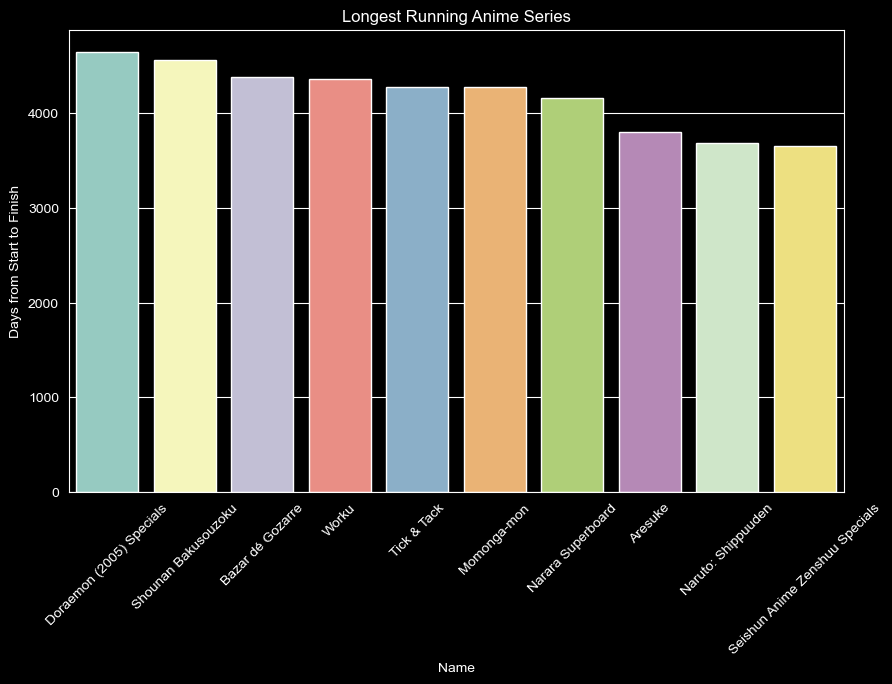

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))


bar1 = sns.barplot(data=df7,x='Name',y='Difference', ax=ax)

bar1.set_title('Longest Running Anime Series')
bar1.set_ylabel('Days from Start to Finish')
plt.xticks(rotation=45)
plt.style.use("dark_background")
bar1

<Axes: title={'center': 'Longest Running Anime Series'}, xlabel='Name', ylabel='Episode Count'>

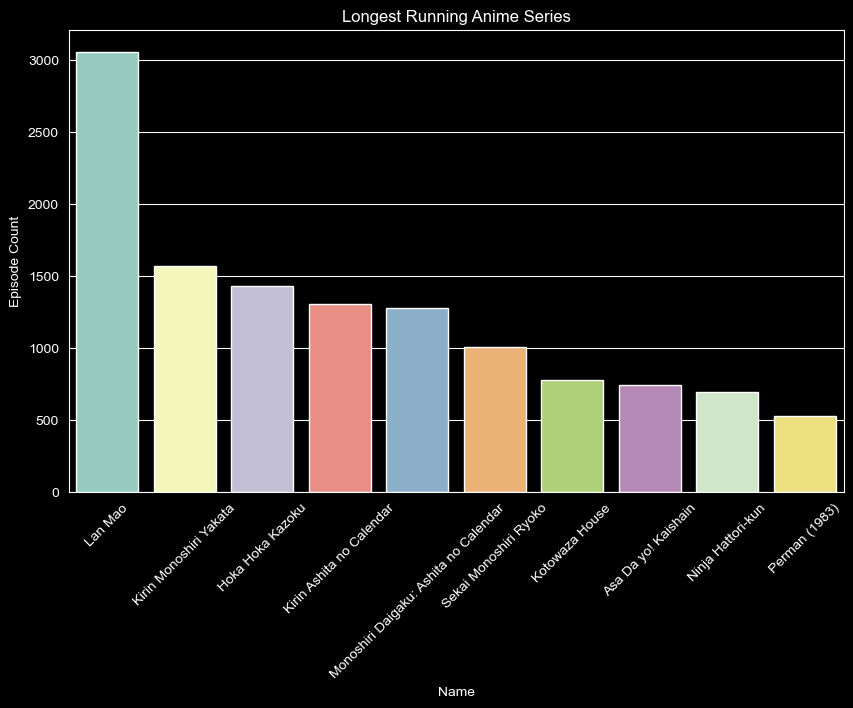

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))


bar2 = sns.barplot(data=df8,x='Name',y='episodes', ax=ax)

bar2.set_title('Longest Running Anime Series')
bar2.set_ylabel('Episode Count')
plt.xticks(rotation=45)
plt.style.use("dark_background")
bar2

In [38]:
df6.groupby('genre')['Difference'].mean().sort_values(ascending=False)

genre
Super Power      649.000000
Military         425.073171
Kids             358.945205
Historical       347.042254
Parody           337.771429
Music            279.189873
Magic            263.192308
Fantasy          255.106952
Action           245.299053
Sports           243.324675
Slice of Life    233.465328
Comedy           223.976911
Sci-Fi           222.831050
Cars             219.700000
Police           187.750000
Drama            187.744262
Romance          168.223684
Mystery          162.008065
Name: Difference, dtype: float64

<Axes: title={'center': 'Population Runtime by Genre'}, xlabel='genre', ylabel='Difference'>

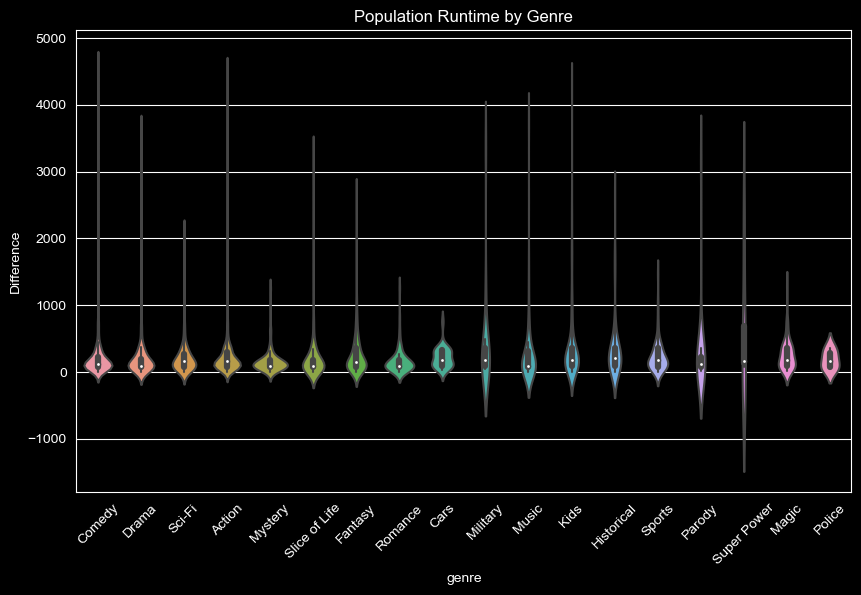

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))


violin = sns.violinplot(data=df6,x='genre',y='Difference', ax=ax)

violin.set_title('Population Runtime by Genre')
plt.xticks(rotation=45)
plt.style.use("dark_background")
violin

In [100]:
df5.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date,year,Date Delta,Difference
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,2015-10-04,2016-03-27,2015,0 175 days 1 534 days 2 ...,175
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,2014-10-10,2015-03-20,2014,0 -198 days 1 161 days 2 ...,161
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,2017-07-07,2017-09-29,2017,0 726 days 1 1085 days 2 ...,84
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,2009-04-05,2010-07-04,2009,0 -1918 days 1 -1559 days 2 ...,455
5,5,37510,Mob Psycho 100 II,Action,13.0,442310,176,21.0,8.89,TV,Bones,2019-01-07,2019-04-01,2019,0 1275 days 1 1634 days 2 6...,84


In [83]:
corrs = df5.loc[:,['episodes','Difference','score','members']].corr()

corrs

,episodes,Difference,score,members
episodes,1.000000,0.300071,0.038156,0.040128
Difference,0.300071,1.000000,0.008541,-0.023817
score,0.038156,0.008541,1.000000,0.488552
members,0.040128,-0.023817,0.488552,1.000000


In [71]:
df11 = df5.dropna(axis=0,how='any',inplace=False)

df11

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date,year,Difference,Avg Release Window
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,2015-10-04,2016-03-27,2015,175,7.000000
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,2014-10-10,2015-03-20,2014,161,7.318182
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,2017-07-07,2017-09-29,2017,84,6.461538
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,2009-04-05,2010-07-04,2009,455,7.109375
5,5,37510,Mob Psycho 100 II,Action,13.0,442310,176,21.0,8.89,TV,Bones,2019-01-07,2019-04-01,2019,84,6.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18932,19304,150,Blood+,Action,50.0,284348,344,1066.0,7.73,TV,Production I.G,2005-10-08,2006-09-23,2005,350,7.000000
18933,19305,4177,Bounen no Xamdou,Action,26.0,108496,1028,1067.0,7.73,ONA,Bones,2008-07-15,2009-02-04,2008,204,7.846154
18934,19306,32979,Flip Flappers,Sci-Fi,13.0,134252,843,1070.0,7.73,TV,Studio 3Hz,2016-10-06,2016-12-29,2016,84,6.461538
18935,19307,123,Fushigi Yuugi,Adventure,52.0,84407,1292,1071.0,7.73,TV,Studio Pierrot,1995-04-06,1996-03-28,1995,357,6.865385


In [90]:
X1 = df11.loc[:,['Difference','episodes','members']]
y1 = df11.score

X1 = sm.add_constant(X1)

model = sm.OLS(y1, X1).fit()
predictions1 = model.predict(X1)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 16 May 2023   Prob (F-statistic):           4.64e-78
Time:                        20:11:50   Log-Likelihood:                -449.19
No. Observations:                1769   AIC:                             906.4
Df Residuals:                    1765   BIC:                             928.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8612      0.011    719.027      0.0

In [91]:
X2 = df11.loc[:,['members']]
y2 = df11.score

X2 = sm.add_constant(X2)

model = sm.OLS(y2, X2).fit()
predictions2 = model.predict(X2)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     397.9
Date:                Tue, 16 May 2023   Prob (F-statistic):           5.16e-80
Time:                        20:11:52   Log-Likelihood:                -450.69
No. Observations:                1769   AIC:                             905.4
Df Residuals:                    1767   BIC:                             916.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8664      0.010    823.710      0.0

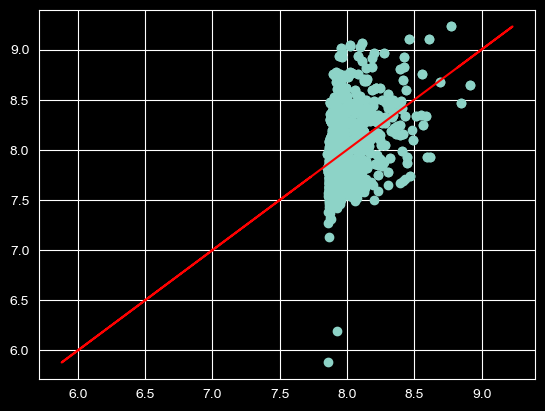

In [95]:
plt.scatter(predictions1, y1)
plt.plot(y1,y1, color='red')
plt.show()

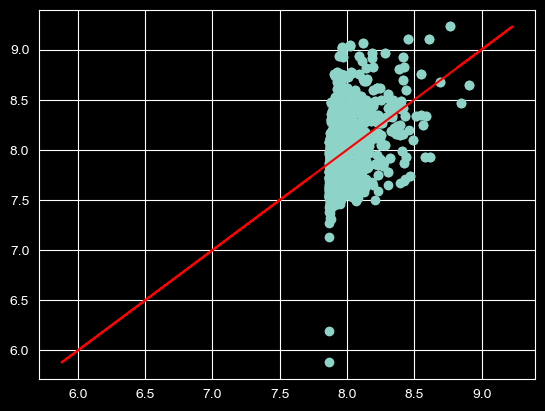

In [94]:
plt.scatter(predictions2, y2)
plt.plot(y2,y2, color='red')
plt.show()

<Axes: title={'center': 'Score vs Number of Voters'}, xlabel='Total Member Votes', ylabel='Score'>

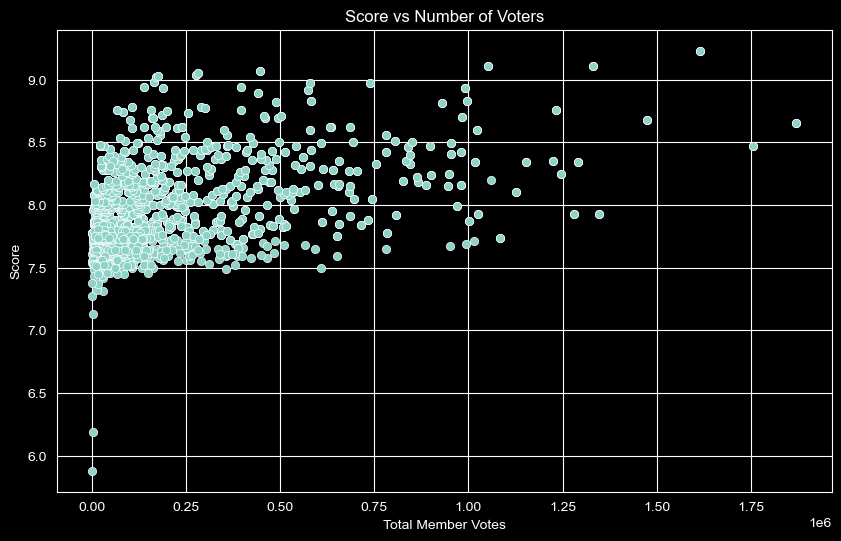

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(data=df11,y='score',x='members',ax=ax)

scatter.set_title('Score vs Number of Voters')
scatter.set_xlabel('Total Member Votes')
scatter.set_ylabel('Score')


scatter

<Axes: >

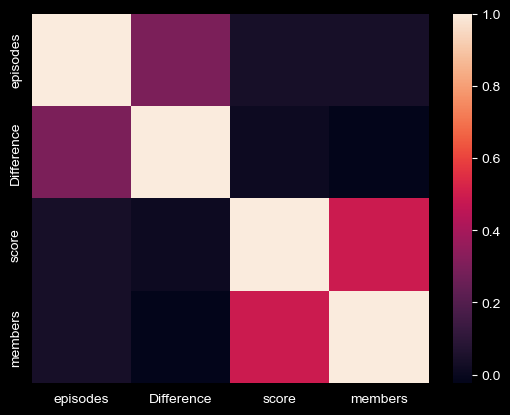

In [84]:
sns.heatmap(corrs)

In [55]:
barChartYear = df2.groupby(['year','genre'],as_index=False).size().reset_index()

In [56]:
barChartYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1405 non-null   int64 
 1   year    1405 non-null   int64 
 2   genre   1405 non-null   object
 3   size    1405 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 44.0+ KB


In [57]:
barChartYear

,index,year,genre,size
0,0,1917,Cars,1
1,1,1917,Comedy,10
2,2,1917,Drama,3
3,3,1917,Kids,2
4,4,1918,Comedy,1
...,...,...,...,...
1400,1400,2020,Sports,8
1401,1401,2021,Action,5
1402,1402,2021,Adventure,2
1403,1403,2021,Music,2


In [60]:
yearBarsdf = barChartYear

In [61]:
yearBarsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1405 non-null   int64 
 1   year    1405 non-null   int64 
 2   genre   1405 non-null   object
 3   size    1405 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 44.0+ KB


In [62]:
yearBarsdf = yearBarsdf.rename(columns={'year':'year','genre':'genre', "size":'total'})

yearBarsdf

,index,year,genre,total
0,0,1917,Cars,1
1,1,1917,Comedy,10
2,2,1917,Drama,3
3,3,1917,Kids,2
4,4,1918,Comedy,1
...,...,...,...,...
1400,1400,2020,Sports,8
1401,1401,2021,Action,5
1402,1402,2021,Adventure,2
1403,1403,2021,Music,2


In [17]:
yearBarsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    1405 non-null   int64 
 1   genre   1405 non-null   object
 2   0       1405 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 33.1+ KB


In [18]:
yearBarsdf.genre.unique()

array(['Cars', 'Comedy', 'Drama', 'Kids', 'Fantasy', 'Historical',
       'Slice of Life', 'Supernatural', 'Adventure', 'Action', 'Military',
       'Music', 'Sports', 'Dementia', 'Hentai', 'Mystery', 'Samurai',
       'Demons', 'Horror', 'Romance', 'Sci-Fi', 'Parody', 'Psychological',
       'Magic', 'Shounen', 'Mecha', 'Space', 'Game', 'School', 'Ecchi',
       'Vampire', 'Police', 'Shoujo', 'Martial Arts', 'Seinen',
       'Super Power', 'Harem', 'Yaoi', 'Josei', 'Thriller', 'Shounen Ai'],
      dtype=object)

In [67]:
barplotOverTime = yearBarsdf.groupby('year',group_keys=True).apply(lambda x: x)

barplotOverTime

index  year      genre  total
year                                    
1917 0         0  1917       Cars      1
     1         1  1917     Comedy     10
     2         2  1917      Drama      3
     3         3  1917       Kids      2
1918 4         4  1918     Comedy      1
...          ...   ...        ...    ...
2020 1400   1400  2020     Sports      8
2021 1401   1401  2021     Action      5
     1402   1402  2021  Adventure      2
     1403   1403  2021      Music      2
     1404   1404  2021     Sci-Fi      2

[1405 rows x 4 columns]

In [73]:
reducedBarPlot = barplotOverTime.loc[barplotOverTime.genre.isin(['Action','Comedy','Adventure','Music','Slice of Life','Drama','Fantasy'])]

reducedBarPlot

index  year          genre  total
year                                        
1917 1         1  1917         Comedy     10
     2         2  1917          Drama      3
1918 4         4  1918         Comedy      1
     5         5  1918          Drama      3
     6         6  1918        Fantasy      1
...          ...   ...            ...    ...
2020 1394   1394  2020          Music     25
     1399   1399  2020  Slice of Life     35
2021 1401   1401  2021         Action      5
     1402   1402  2021      Adventure      2
     1403   1403  2021          Music      2

[494 rows x 4 columns]

(0.0, 255.0)

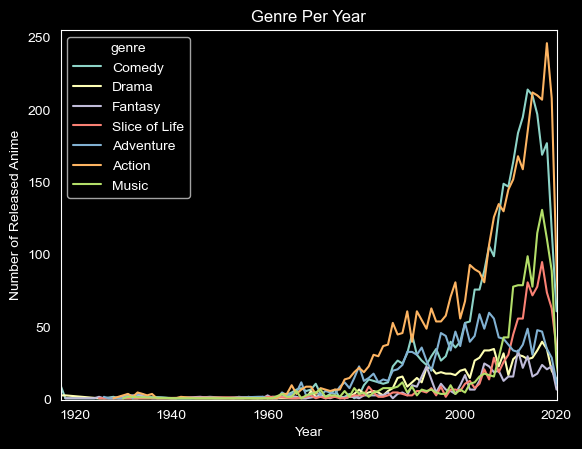

In [93]:
#values are "0"
#index is 'year' - the grouped one?
#columns should be genre?
plt.style.use("dark_background")
genreYear = sns.lineplot(x='year',y='total',data=reducedBarPlot,hue='genre')

genreYear.set_xlabel('Year')
genreYear.set_ylabel('Number of Released Anime')
genreYear.set_title('Genre Per Year')
genreYear.set_xlim(1917,2020)
genreYear.set_ylim(0,255)